In [9]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm_notebook
import re
#word encoding
import codecs
#natural language toolkit
import nltk
import collections

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Prep

In [0]:
def tokenize(text):
    # obtains tokens with a least 1 alphabet
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

def mapping(tokens):
    word_to_id = dict()
    id_to_word = dict()

    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token

    return word_to_id, id_to_word

def generate_training_data(tokens, word_to_id, window_size):
    N = len(tokens)
    X, Y = [], []

    for i in range(N):
        nbr_inds = list(range(max(0, i - window_size), i)) + \
                   list(range(i + 1, min(N, i + window_size + 1)))
        print("At index ", i, "we have: ", nbr_inds)
        for j in nbr_inds:
            X.append(word_to_id[tokens[i]])
            Y.append(word_to_id[tokens[j]])
            
    X = np.array(X)
    X = np.expand_dims(X, axis=0)
    Y = np.array(Y)
    Y = np.expand_dims(Y, axis=0)
            
    return X, Y

In [3]:
from google.colab import files

uploaded = files.upload()

Saving odyssee.txt to odyssee.txt


In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
file = open('odyssee.txt', 'rt', encoding="utf-8")
text = file.read()
file.close()
# split into words
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.snowball import FrenchStemmer
from nltk.corpus import stopwords

tokens = word_tokenize(text)
# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
ps = PorterStemmer() 
fr = FrenchStemmer(ignore_stopwords=False)
# choose some words to be stemmed 
stemm = []
stemms = []
for w in words: 
    stemm.append(ps.stem(w)) 
for w in words: 
    stemms.append(fr.stem(w))

#remove stop words
stop = set(stopwords.words('english'))
stopf = set(stopwords.words('french'))
tokens_stop = [j for j in stemms if j not in stopf]
print(words[220:240])
print(stemm[220:240])
print(stemms[220:240])
print(tokens_stop[220:240])

['Et', 'quand', 'le', 'temps', 'vint', 'après', 'le', 'déroulement', 'des', 'années', 'où', 'les', 'Dieux', 'voulurent', 'revît', 'sa', 'demeure', 'en', 'Ithakè', 'même']
['Et', 'quand', 'le', 'temp', 'vint', 'aprè', 'le', 'déroulement', 'de', 'anné', 'où', 'le', 'dieux', 'voulur', 'revît', 'sa', 'demeur', 'en', 'ithakè', 'même']
['et', 'quand', 'le', 'temp', 'vint', 'apres', 'le', 'déroul', 'de', 'anné', 'où', 'le', 'dieux', 'voulurent', 'rev', 'sa', 'demeur', 'en', 'ithakè', 'mêm']
['coeur', 'aigisthos', 'orestes', 'agamemnonid', 'souven', 'cel', 'dit', 'parol', 'immortel', 'ah', 'combien', 'homm', 'accusent', 'dieux', 'disent', 'maux', 'viennent', 'seul', 'aggravent', 'destin']


In [6]:
np.size(tokens_stop)

59807

In [0]:
#remove stop words
stop = set(stopwords.words('french'))
wordcount = collections.defaultdict(int)
for word in tokens_stop: 
    if word not in stop:
        wordcount[word] += 1        


In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [0]:

sorted_words = {k: v for k, v in sorted(wordcount.items(), key=lambda item: item[1],reverse=True)}


In [0]:
tokens = words[:90000]

In [0]:
word_to_id, id_to_word = mapping(tokens_stop)
#print(word_to_id)
#print(id_to_word)

In [18]:
X, Y = generate_training_data(tokens_stop, word_to_id, 2)
#print(X)
#print(Y)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
At index  54808 we have:  [54806, 54807, 54809, 54810]
At index  54809 we have:  [54807, 54808, 54810, 54811]
At index  54810 we have:  [54808, 54809, 54811, 54812]
At index  54811 we have:  [54809, 54810, 54812, 54813]
At index  54812 we have:  [54810, 54811, 54813, 54814]
At index  54813 we have:  [54811, 54812, 54814, 54815]
At index  54814 we have:  [54812, 54813, 54815, 54816]
At index  54815 we have:  [54813, 54814, 54816, 54817]
At index  54816 we have:  [54814, 54815, 54817, 54818]
At index  54817 we have:  [54815, 54816, 54818, 54819]
At index  54818 we have:  [54816, 54817, 54819, 54820]
At index  54819 we have:  [54817, 54818, 54820, 54821]
At index  54820 we have:  [54818, 54819, 54821, 54822]
At index  54821 we have:  [54819, 54820, 54822, 54823]
At index  54822 we have:  [54820, 54821, 54823, 54824]
At index  54823 we have:  [54821, 54822, 54824, 54825]
At index  54824 we have:  [54822, 54823, 5

In [19]:
vocab_size = len(id_to_word)
m = Y.shape[1]
print(m)
# turn Y into one hot encoding
Y_one_hot = np.zeros((vocab_size, m))
print(Y_one_hot)
print(Y_one_hot.shape)
print()
print(Y.flatten())
Y_one_hot[Y.flatten(), np.arange(m)] = 1
print(Y_one_hot)

239222
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(4164, 239222)

[ 532  835   66 ...  835 2806 1505]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Initialization

In [0]:
def initialize_wrd_emb(vocab_size, emb_size):
    """
    vocab_size: int. vocabulary size of your corpus or training data
    emb_size: int. word embedding size. How many dimensions to represent each vocabulary
    """
    WRD_EMB = np.random.randn(vocab_size, emb_size) * 0.01
    
    assert(WRD_EMB.shape == (vocab_size, emb_size))
    return WRD_EMB

def initialize_dense(input_size, output_size):
    """
    input_size: int. size of the input to the dense layer
    output_szie: int. size of the output out of the dense layer
    """
    W = np.random.randn(output_size, input_size) * 0.01
    
    assert(W.shape == (output_size, input_size))
    return W

def initialize_parameters(vocab_size, emb_size):
    WRD_EMB = initialize_wrd_emb(vocab_size, emb_size)
    W = initialize_dense(emb_size, vocab_size)
    
    parameters = {}
    parameters['WRD_EMB'] = WRD_EMB
    parameters['W'] = W
    
    return parameters

## Forward Propagation

In [0]:
def ind_to_word_vecs(inds, parameters):
    """
    inds: numpy array. shape: (1, m)
    parameters: dict. weights to be trained
    """
    m = inds.shape[1]
    WRD_EMB = parameters['WRD_EMB']
    word_vec = WRD_EMB[inds.flatten(), :].T
    
    assert(word_vec.shape == (WRD_EMB.shape[1], m))
    
    return word_vec

def linear_dense(word_vec, parameters):
    """
    word_vec: numpy array. shape: (emb_size, m)
    parameters: dict. weights to be trained
    """
    m = word_vec.shape[1]
    W = parameters['W']
    Z = np.dot(W, word_vec)
    
    assert(Z.shape == (W.shape[0], m))
    
    return W, Z

def softmax(Z):
    """
    Z: output out of the dense layer. shape: (vocab_size, m)
    """
    softmax_out = np.divide(np.exp(Z), np.sum(np.exp(Z), axis=0, keepdims=True) + 0.001)
    
    assert(softmax_out.shape == Z.shape)

    return softmax_out

def forward_propagation(inds, parameters):
    word_vec = ind_to_word_vecs(inds, parameters)
    W, Z = linear_dense(word_vec, parameters)
    softmax_out = softmax(Z)
    
    caches = {}
    caches['inds'] = inds
    caches['word_vec'] = word_vec
    caches['W'] = W
    caches['Z'] = Z
    
    return softmax_out, caches

## Cost Function

In [0]:
def cross_entropy(softmax_out, Y):
    """
    softmax_out: output out of softmax. shape: (vocab_size, m)
    """
    m = softmax_out.shape[1]
    cost = -(1 / m) * np.sum(np.sum(Y * np.log(softmax_out + 0.001), axis=0, keepdims=True), axis=1)
    return cost

## Backward Propagation

In [0]:
def softmax_backward(Y, softmax_out):
    """
    Y: labels of training data. shape: (vocab_size, m)
    softmax_out: output out of softmax. shape: (vocab_size, m)
    """
    dL_dZ = softmax_out - Y
    
    assert(dL_dZ.shape == softmax_out.shape)
    return dL_dZ

def dense_backward(dL_dZ, caches):
    """
    dL_dZ: shape: (vocab_size, m)
    caches: dict. results from each steps of forward propagation
    """
    W = caches['W']
    word_vec = caches['word_vec']
    m = word_vec.shape[1]
    
    dL_dW = (1 / m) * np.dot(dL_dZ, word_vec.T)
    dL_dword_vec = np.dot(W.T, dL_dZ)

    assert(W.shape == dL_dW.shape)
    assert(word_vec.shape == dL_dword_vec.shape)
    
    return dL_dW, dL_dword_vec

def backward_propagation(Y, softmax_out, caches):
    dL_dZ = softmax_backward(Y, softmax_out)
    dL_dW, dL_dword_vec = dense_backward(dL_dZ, caches)
    
    gradients = dict()
    gradients['dL_dZ'] = dL_dZ
    gradients['dL_dW'] = dL_dW
    gradients['dL_dword_vec'] = dL_dword_vec
    
    return gradients

def update_parameters(parameters, caches, gradients, learning_rate):
    vocab_size, emb_size = parameters['WRD_EMB'].shape
    inds = caches['inds']
    dL_dword_vec = gradients['dL_dword_vec']
    m = inds.shape[-1]
    
    parameters['WRD_EMB'][inds.flatten(), :] -= dL_dword_vec.T * learning_rate

    parameters['W'] -= learning_rate * gradients['dL_dW']
    

In [0]:
from datetime import datetime

import matplotlib.pyplot as plt


def skipgram_model_training(X, Y, vocab_size, emb_size, learning_rate, epochs, batch_size=256, parameters=None, print_cost=False, plot_cost=True):
    costs = []
    m = X.shape[1]
    
    if parameters is None:
        parameters = initialize_parameters(vocab_size, emb_size)
    
    begin_time = datetime.now()
    %%time
    for epoch in range(epochs):
        
        epoch_cost = 0
        batch_inds = list(range(0, m, batch_size))
        np.random.shuffle(batch_inds)
        for i in batch_inds:
            X_batch = X[:, i:i+batch_size]
            Y_batch = Y[:, i:i+batch_size]

            softmax_out, caches = forward_propagation(X_batch, parameters)
            #print("softmax size is: ", softmax_out.shape)
            gradients = backward_propagation(Y_batch, softmax_out, caches)
            update_parameters(parameters, caches, gradients, learning_rate)
            cost = cross_entropy(softmax_out, Y_batch)
            epoch_cost += np.squeeze(cost) # turn ndarray into floating number
            
        costs.append(epoch_cost)
        if print_cost and epoch % 1 == 0:
            print("Cost after epoch {}: {}".format(epoch, epoch_cost))
        if epoch % 100 == 0:
            learning_rate *= 0.98
    end_time = datetime.now()
    print('training time: {}'.format(end_time - begin_time))
            
    if plot_cost:
        plt.plot(np.arange(epochs), costs)
        plt.xlabel('# of epochs')
        plt.ylabel('cost')
    return parameters

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.77 µs
Cost after epoch 0: 25016.618429692622
Cost after epoch 1: 25015.793906637293
Cost after epoch 2: 24962.547896986867
Cost after epoch 3: 24403.731030506857
Cost after epoch 4: 23577.531846825594
Cost after epoch 5: 23103.67753052848
Cost after epoch 6: 22850.6925164205
Cost after epoch 7: 22694.89513710174
Cost after epoch 8: 22583.774285716616
Cost after epoch 9: 22493.557102421004
training time: 0:17:12.824340


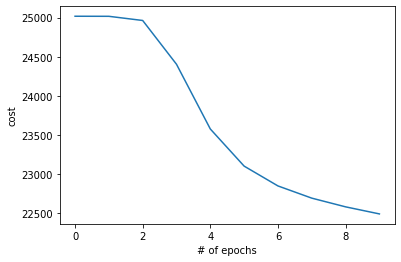

In [25]:
paras = skipgram_model_training(X, Y_one_hot, vocab_size, 7, 0.05, 10, batch_size=64, parameters=None, print_cost=True)

In [26]:
paras

{'W': array([[ 0.02794041,  0.01739338, -0.01766276, ..., -0.01972312,
         -0.00133079,  0.01216278],
        [-0.06915861,  0.0406235 , -0.25130271, ..., -0.28458417,
         -0.01303129,  0.38776878],
        [-0.10699841, -0.00847328, -0.0730883 , ..., -0.06636163,
          0.04012848,  0.17064701],
        ...,
        [ 0.03596958, -0.0083066 ,  0.05217435, ...,  0.06633874,
          0.00842148, -0.09934726],
        [ 0.02165353, -0.00065185,  0.02279871, ...,  0.01312107,
          0.00109652, -0.01251998],
        [ 0.04299687, -0.00712914,  0.0944683 , ...,  0.08054627,
         -0.00096516, -0.12830708]]),
 'WRD_EMB': array([[-1.68789585e-01,  9.80620852e-02, -4.91398902e-01, ...,
         -5.30910505e-01,  6.69629338e-02,  8.32724180e-01],
        [-2.85792575e-01,  2.61802350e-01, -9.85846210e-01, ...,
         -1.02024747e+00, -3.26215550e-02,  1.47659743e+00],
        [-2.36305729e-01,  2.32442241e-01, -9.34009237e-01, ...,
         -1.09151890e+00,  1.18451272e-0

In [27]:
print(paras.keys())

dict_keys(['WRD_EMB', 'W'])


In [28]:
print(paras["WRD_EMB"].shape)
print(paras["WRD_EMB"])

(4164, 7)
[[-1.68789585e-01  9.80620852e-02 -4.91398902e-01 ... -5.30910505e-01
   6.69629338e-02  8.32724180e-01]
 [-2.85792575e-01  2.61802350e-01 -9.85846210e-01 ... -1.02024747e+00
  -3.26215550e-02  1.47659743e+00]
 [-2.36305729e-01  2.32442241e-01 -9.34009237e-01 ... -1.09151890e+00
   1.18451272e-01  1.50130345e+00]
 ...
 [-2.35905452e-02  3.72171535e-02 -1.18964782e-01 ... -1.35237174e-01
   2.62115427e-04  2.18423740e-01]
 [-7.49546526e-02  7.90894192e-02 -3.66108315e-01 ... -4.09183158e-01
   3.71528732e-02  5.47158037e-01]
 [ 1.64866070e-02 -1.21364435e-02  1.08849114e-02 ...  6.16834498e-02
   2.26333039e-03 -6.25165993e-02]]


In [29]:
print(paras["W"].shape)
print(paras["W"])

(4164, 7)
[[ 0.02794041  0.01739338 -0.01766276 ... -0.01972312 -0.00133079
   0.01216278]
 [-0.06915861  0.0406235  -0.25130271 ... -0.28458417 -0.01303129
   0.38776878]
 [-0.10699841 -0.00847328 -0.0730883  ... -0.06636163  0.04012848
   0.17064701]
 ...
 [ 0.03596958 -0.0083066   0.05217435 ...  0.06633874  0.00842148
  -0.09934726]
 [ 0.02165353 -0.00065185  0.02279871 ...  0.01312107  0.00109652
  -0.01251998]
 [ 0.04299687 -0.00712914  0.0944683  ...  0.08054627 -0.00096516
  -0.12830708]]


## Evaluate

In [30]:
X_test = np.arange(vocab_size)
X_test = np.expand_dims(X_test, axis=0)
print(X_test)
print()
softmax_test, _ = forward_propagation(X_test, paras)
top_sorted_inds = np.argsort(softmax_test, axis=0)[-5:,:]
print(top_sorted_inds)

[[   0    1    2 ... 4161 4162 4163]]

[[ 712  712  712 ... 4009  712  532]
 [3153 4009 4009 ... 3402 4009 1300]
 [4009  280  280 ... 3530  280 3669]
 [3530 3530 3530 ...  280 3530   66]
 [   5    5    5 ...    5    5 3880]]


In [31]:
top_sorted_inds[::-1]

array([[   5,    5,    5, ...,    5,    5, 3880],
       [3530, 3530, 3530, ...,  280, 3530,   66],
       [4009,  280,  280, ..., 3530,  280, 3669],
       [3153, 4009, 4009, ..., 3402, 4009, 1300],
       [ 712,  712,  712, ..., 4009,  712,  532]])

In [32]:
top_sorted_inds[::-1, 0]

array([   5, 3530, 4009, 3153,  712])

In [33]:
for input_ind in range(vocab_size):
    input_word = id_to_word[input_ind]
    output_words = [id_to_word[output_ind] for output_ind in top_sorted_inds[::-1, input_ind]]
    print("{}'s top {} neighbor words: {}".format(input_word, len(output_words), output_words))

orestes's top 5 neighbor words: ['dan', 'parl', 'homm', 'tous', 'point']
écout's top 5 neighbor words: ['dan', 'parl', 'odysseus', 'homm', 'point']
krètè's top 5 neighbor words: ['dan', 'parl', 'odysseus', 'homm', 'point']
avanc's top 5 neighbor words: ['dan', 'parl', 'odysseus', 'homm', 'point']
antiqu's top 5 neighbor words: ['dan', 'odysseus', 'ains', 'parl', 'dit']
dan's top 5 neighbor words: ['demeur', 'nef', 'parl', 'coeur', 'terr']
tueur's top 5 neighbor words: ['dan', 'parl', 'ains', 'odysseus', 'demeur']
moir's top 5 neighbor words: ['dan', 'parl', 'odysseus', 'homm', 'point']
distanc's top 5 neighbor words: ['dan', 'parl', 'demeur', 'tous', 'point']
licensed's top 5 neighbor words: ['the', 'project', 'work', 'of', 'gutenberg']
mien's top 5 neighbor words: ['dan', 'ains', 'odysseus', 'parl', 'dit']
prosternon's top 5 neighbor words: ['dan', 'parl', 'homm', 'odysseus', 'point']
print's top 5 neighbor words: ['the', 'project', 'work', 'of', 'gutenberg']
éternu's top 5 neighbor w